<a href="https://colab.research.google.com/github/YogeshRajgure/iNeuron_Assignments/blob/main/A22_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#from sklearn.tree import DecisionTreeRegressor 
#from sklearn.linear_model import LinearRegression 
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error from

In [ ]:
conn = sqlite3.connect('database.sqlite')
df_stats = pd.read_sql_query('select * from Player_Attributes', conn)
df_player = pd.read_sql_query('select * from Player', conn)

In [ ]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [ ]:
df_stats.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
df_player['birthday'] = pd.to_datetime(df_player['birthday'])

df_player['birth_day'] = df_player['birthday'].apply(lambda x : x.day)
df_player['birth_month'] = df_player['birthday'].apply(lambda x : x.month)
df_player['birth_year'] = df_player['birthday'].apply(lambda x : x.year)


In [ ]:
df_stats.drop(columns = ['id', 'player_fifa_api_id', 'date'],
              inplace = True)

df_player.drop(columns = ['id', 'player_name', 'player_fifa_api_id', 'birthday'],
               inplace = True)

In [ ]:
df_player

,player_api_id,height,weight,birth_day,birth_month,birth_year
0,505942,182.88,187,29,2,1992
1,155782,170.18,146,15,12,1989
2,162549,170.18,163,13,5,1991
3,30572,182.88,198,8,5,1982
4,23780,182.88,154,8,11,1979
...,...,...,...,...,...,...
11055,26357,182.88,168,3,4,1979
11056,111182,182.88,176,18,12,1986
11057,36491,180.34,154,29,4,1979
11058,35506,185.42,172,6,10,1981


In [ ]:
df_stats

,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,39902,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,39902,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,39902,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [ ]:
# we did this because
# in the above dataset every players performance over different period of time
# is given, for which mainly change can be observed in continuous features
# while the categorical features are always same
# Eg. preffered_foot, attacking & defensive work_rate
# so using below query, we are taking categoricl feature of player for to be
# merged with continuous features in below cells

categoricals = df_stats.groupby(by='player_api_id', as_index=False)[['player_api_id',
                                                     'preferred_foot',
                                                     'attacking_work_rate',
                                                     'defensive_work_rate'
                                                     ]].head(1)

In [ ]:
categoricals

,player_api_id,preferred_foot,attacking_work_rate,defensive_work_rate
0,505942,right,medium,medium
5,155782,left,high,medium
38,162549,right,medium,medium
64,30572,right,medium,medium
87,23780,right,medium,medium
...,...,...,...,...
183924,26357,right,low,medium
183937,111182,left,high,medium
183953,36491,left,None,_0
183960,35506,right,None,_0


In [ ]:
# cleaning the categorical features by replacing null values with the max used category

for column in ['attacking_work_rate', 'defensive_work_rate']:
    
    categoricals[column] = categoricals[column].apply(lambda x: np.NaN if x not in ['low', 'medium', 'high'] else x)
    
    categoricals[column] = categoricals[column].fillna(categoricals[column].mode()[0])
    

In [ ]:
categoricals

,player_api_id,preferred_foot,attacking_work_rate,defensive_work_rate
0,505942,right,medium,medium
5,155782,left,high,medium
38,162549,right,medium,medium
64,30572,right,medium,medium
87,23780,right,medium,medium
...,...,...,...,...
183924,26357,right,low,medium
183937,111182,left,high,medium
183953,36491,left,medium,medium
183960,35506,right,medium,medium


In [ ]:
# taking mean performance of each player for continuous features

df_stats = df_stats.groupby(by='player_api_id').mean()
df_stats

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,,,,,,,,,,,,,,,,,,,,,
2625,60.142857,61.142857,50.142857,47.285714,46.285714,56.500000,38.000000,54.142857,50.000000,49.928571,...,55.285714,61.928571,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571
2752,69.380952,70.380952,36.428571,37.428571,75.333333,54.809524,20.428571,44.857143,30.428571,18.857143,...,52.428571,35.428571,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238
2768,69.285714,70.571429,42.238095,42.761905,66.666667,64.714286,28.761905,40.238095,51.761905,20.047619,...,57.761905,31.904762,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238
2770,71.133333,73.533333,61.866667,67.666667,67.800000,72.533333,67.133333,75.066667,79.800000,68.666667,...,71.600000,63.933333,30.200000,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000
2790,70.200000,75.800000,70.000000,37.400000,55.200000,68.000000,43.000000,60.800000,67.000000,55.400000,...,60.000000,55.400000,74.600000,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744907,51.909091,65.909091,42.454545,44.454545,47.454545,59.454545,42.454545,56.454545,46.454545,43.454545,...,51.454545,52.454545,39.454545,48.454545,49.454545,8.454545,13.454545,12.454545,11.454545,8.454545
746419,59.000000,66.000000,55.000000,28.000000,50.000000,35.000000,29.000000,67.000000,37.000000,39.000000,...,40.000000,43.000000,55.000000,69.000000,62.000000,7.000000,10.000000,7.000000,9.000000,9.000000
748432,58.000000,68.000000,48.000000,26.000000,57.000000,49.000000,24.000000,41.000000,39.000000,20.000000,...,36.000000,45.000000,63.000000,69.000000,68.000000,8.000000,8.000000,12.000000,12.000000,6.000000


In [ ]:
# now in this way, we removed the multiple data while preserving all data

df_stats = df_stats.merge(categoricals, on='player_api_id')
df_stats


,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,2625,60.142857,61.142857,50.142857,47.285714,46.285714,56.500000,38.000000,54.142857,50.000000,...,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571,right,medium,medium
1,2752,69.380952,70.380952,36.428571,37.428571,75.333333,54.809524,20.428571,44.857143,30.428571,...,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238,right,medium,medium
2,2768,69.285714,70.571429,42.238095,42.761905,66.666667,64.714286,28.761905,40.238095,51.761905,...,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238,left,medium,medium
3,2770,71.133333,73.533333,61.866667,67.666667,67.800000,72.533333,67.133333,75.066667,79.800000,...,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000,right,medium,low
4,2790,70.200000,75.800000,70.000000,37.400000,55.200000,68.000000,43.000000,60.800000,67.000000,...,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000,left,medium,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11055,744907,51.909091,65.909091,42.454545,44.454545,47.454545,59.454545,42.454545,56.454545,46.454545,...,48.454545,49.454545,8.454545,13.454545,12.454545,11.454545,8.454545,left,medium,medium
11056,746419,59.000000,66.000000,55.000000,28.000000,50.000000,35.000000,29.000000,67.000000,37.000000,...,69.000000,62.000000,7.000000,10.000000,7.000000,9.000000,9.000000,right,high,medium
11057,748432,58.000000,68.000000,48.000000,26.000000,57.000000,49.000000,24.000000,41.000000,39.000000,...,69.000000,68.000000,8.000000,8.000000,12.000000,12.000000,6.000000,right,medium,medium
11058,750435,56.444444,70.444444,35.000000,57.000000,55.000000,60.000000,52.000000,58.555556,56.000000,...,19.000000,21.000000,9.000000,10.000000,8.000000,10.000000,11.000000,right,medium,low


In [ ]:
# finding continuous features having null values

col_having_na = df_stats.loc[ : , df_stats.isna().sum() > 0 ].columns
col_having_na

Index(['volleys', 'curve', 'agility', 'balance', 'jumping', 'vision',
       'sliding_tackle'],
      dtype='object')

In [ ]:
# filling all the null values in the continuous features

for col in col_having_na:
    
    df_stats[col] = df_stats[col].fillna(df_stats[col].mean())

In [ ]:
# now merge both the player and its stats into one dataframe

df = df_player.merge(df_stats, on='player_api_id')
df.drop(columns=['player_api_id'])
df.head()

,player_api_id,height,weight,birth_day,birth_month,birth_year,overall_rating,potential,crossing,finishing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,505942,182.88,187,29,2,1992,63.600000,67.600000,48.600000,43.600000,...,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000,right,medium,medium
1,155782,170.18,146,15,12,1989,66.969697,74.484848,70.787879,49.454545,...,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091,left,high,medium
2,162549,170.18,163,13,5,1991,67.000000,74.192308,68.115385,57.923077,...,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000,right,medium,medium
3,30572,182.88,198,8,5,1982,69.086957,70.782609,57.217391,26.260870,...,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913,right,medium,medium
4,23780,182.88,154,8,11,1979,73.240000,74.680000,45.080000,38.840000,...,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000,right,medium,medium


In [ ]:
# binary encoding for categorical feature with only two categories

# preferred foot
# right = 1
# left = 0

df['preferred_foot'] = df['preferred_foot'].replace({'left':0 , 'right':1})

# one hot encoding

df = pd.get_dummies(df)

df    

In [ ]:
# split data into x and y

X = df.drop(columns=['overall_rating'])
y = df['overall_rating']

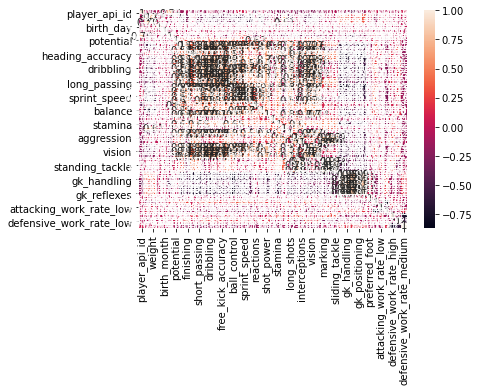

In [ ]:
import seaborn as sns
sns.heatmap(X.corr(), annot=True)

In [ ]:
cor = X.corr()

In [ ]:
cor[cor>0.9].sum() #there are some instances where 1 or more columns have mox corr, but we will try to forget that ane move forward

player_api_id                 1.000000
height                        1.000000
weight                        1.000000
birth_day                     1.000000
birth_month                   1.000000
birth_year                    1.000000
potential                     1.000000
crossing                      1.000000
finishing                     1.000000
heading_accuracy              1.000000
short_passing                 1.905351
volleys                       1.000000
dribbling                     1.909226
curve                         1.000000
free_kick_accuracy            1.000000
long_passing                  1.000000
ball_control                  2.814577
acceleration                  1.923841
sprint_speed                  1.923841
agility                       1.000000
reactions                     1.000000
balance                       1.000000
shot_power                    1.000000
jumping                       1.000000
stamina                       1.000000
strength                 

In [ ]:
# Train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 355)


In [ ]:
# scale the data using standard scalar

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
# applying normal regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

l_reg = LinearRegression()
l_reg.fit(x_train, y_train)

y_test_pred = l_reg.predict(x_test)

print('-'*70)
print('Linear Regression model')
print('-'*70)
print(f'train score : {l_reg.score(x_train, y_train)}')
print(f'test score  : {l_reg.score(x_test, y_test)}')
print('-'*70)
print(f'r2 score for test  : {r2_score(y_test, y_test_pred)}')

----------------------------------------------------------------------
Linear Regression model
----------------------------------------------------------------------
train score : 0.9012051901771369
test score  : 0.9074351577755082
----------------------------------------------------------------------
r2 score for test  : 0.9074351577755082


In [ ]:
from sklearn import metrics

print(f'MAE:{metrics.mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE:{metrics.mean_squared_error(y_test, y_test_pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}')

MAE:1.4720270228131687
MSE:3.7221521670931303
RMSE:1.9292879948553898


In [ ]:
# lasso regularization
from sklearn.linear_model import LassoCV, Lasso, RidgeCV, Ridge

lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [ ]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

5.347909088865861e-05

In [ ]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=5.347909088865861e-05)

In [ ]:
lasso_reg.score(x_test, y_test)

0.907434836225596

In [ ]:
lasso_reg.score(x_train, y_train)

0.9012051870590695

In [ ]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.18465597, 6.71340618, 6.94291728, 2.19908181, 5.28903864,
       3.58819994, 0.86565396, 7.16353117, 5.33050464, 9.80711424,
       7.70828696, 2.47615013, 7.990547  , 5.40471361, 8.27485523,
       6.11319932, 7.39222173, 9.53618961, 0.32467789, 1.44973573,
       1.70159018, 0.42297225, 4.86452185, 5.19875824, 9.31692535,
       0.21081342, 7.24750182, 4.68412106, 9.03310149, 3.45521746,
       9.55519152, 3.93127586, 3.09382248, 6.58625596, 4.18800865,
       2.34665443, 1.52386149, 3.67246063, 3.37251409, 1.03733103,
       9.02591661, 8.49960452, 3.23085085, 1.58072346, 9.28519387,
       4.48888865, 6.27180596, 6.9101393 , 7.78474295, 7.84310841]),
        cv=10, normalize=True)

In [ ]:
ridgecv.alpha_

0.21081342111122003

In [ ]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.21081342111122003)

In [ ]:
ridge_model.score(x_test, y_test)

0.9074350315628358

In [ ]:
ridge_model.score(x_train, y_train)

0.9012051901135012

In [ ]:
# as we get same results even after applying the l1 and l2 regularization
# hence, we conclude that our model is not overfitted

In [ ]:
# lets try random forest model and try to increase score

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

y_test_pred = rf_reg.predict(x_test)

print('-'*70)
print('Random Forest Regression model')
print('-'*70)
print(f'train score : {rf_reg.score(x_train, y_train)}')
print(f'test score  : {rf_reg.score(x_test, y_test)}')
print('-'*70)
print(f'r2 score for test  : {r2_score(y_test, y_test_pred)}')

----------------------------------------------------------------------
Random Forest Regression model
----------------------------------------------------------------------
train score : 0.9922853959637371
test score  : 0.9461660654311761
----------------------------------------------------------------------
r2 score for test  : 0.9461660654311761


In [ ]:
from sklearn import metrics

print(f'MAE:{metrics.mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE:{metrics.mean_squared_error(y_test, y_test_pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}')

MAE:1.050157235232219
MSE:2.1647322180113795
RMSE:1.471302898118324


### As we can see that score and validation values using RandomForest are far better than using LinearRegression

### So, we can conclude that Random Forest better suits for model

### MAE   : 1.050157235232219
### MSE   : 2.1647322180113795
### RMSE : 1.471302898118324
